# healthcare data set

# import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

# loading dataset

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Blue Star Computer\\Downloads\\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data inspection and summery

In [3]:
# display the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.shape

(5110, 12)

In [7]:
# Counting the number of occurrences of each gender in the DataFrame
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
# This loop iterates through each column in the DataFrame and prints the value counts for each column.
# It helps in understanding the distribution of data within each column, aiding in data exploration and analysis.
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

import pandas as pd

# Assuming df is your DataFrame
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'id':
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64

Value counts for column 'gender':
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Value counts for column 'age':
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

Value counts for column 'hypertension':
0    4612
1     498
Name: hypertension, dtype: int64

Value counts for column 'heart_disease':
0    4834
1     276
Name: heart_disease, dtype: int64

Value counts for column 'ever_married':
Yes    3353
No     1757
Name: ever_married, dtype: int64

Value counts for column 'work_type':
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Value counts for column 'R

In [9]:
df.sort_values(by='age')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,19271,Female,82.00,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
4094,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
2341,10649,Female,82.00,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4716,5387,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0


In [10]:
# Import the display module from IPython
from IPython.display import display
sorted_df = df.sort_values(by='age')
print(sorted_df)



         id  gender    age  hypertension  heart_disease ever_married  \
3295  29955    Male   0.08             0              0           No   
1614  47350  Female   0.08             0              0           No   
3618  22877    Male   0.16             0              0           No   
4021   8247    Male   0.16             0              0           No   
3968  41500    Male   0.16             0              0           No   
...     ...     ...    ...           ...            ...          ...   
4590  19271  Female  82.00             1              1          Yes   
4094  25510    Male  82.00             0              0          Yes   
2341  10649  Female  82.00             0              0          Yes   
4716   5387  Female  82.00             0              0           No   
187   67895  Female  82.00             1              1          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
3295       children          Rural              70.33  

In [11]:
from IPython.display import display

# Assuming sorted_df is your sorted DataFrame
display(sorted_df)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,19271,Female,82.00,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
4094,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
2341,10649,Female,82.00,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4716,5387,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0


In [12]:
# individual country information.
Rural=df[df['Residence_type']=='Rural']
Rural.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
20,70630,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1


In [13]:
# Now we will understand about gender.
Rural.sort_values(by=['age'],ascending=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1769,32452,Female,82.00,0,1,Yes,Self-employed,Rural,211.88,28.7,never smoked,0
35,712,Female,82.00,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
3388,52679,Female,82.00,0,0,Yes,Self-employed,Rural,78.00,31.3,formerly smoked,0
5062,11184,Female,82.00,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
188,30184,Male,82.00,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1999,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0


In [14]:
# Calculate the counts of smoking status for residents living in rural areas
rural_smoking_counts = df[df['Residence_type'] == 'Rural']['smoking_status'].value_counts()
print("Smoking status counts for rural residents:")
print(rural_smoking_counts)


Smoking status counts for rural residents:
never smoked       961
Unknown            762
formerly smoked    428
smokes             363
Name: smoking_status, dtype: int64


In [15]:
# Calculate the sum of missing values for each column in the DataFrame
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
# Fill missing values in the 'bmi' column with the mean of non-missing value
# inplace=True ensures that the changes are made directly to the DataFrame
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [17]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pair plot for numerical variables

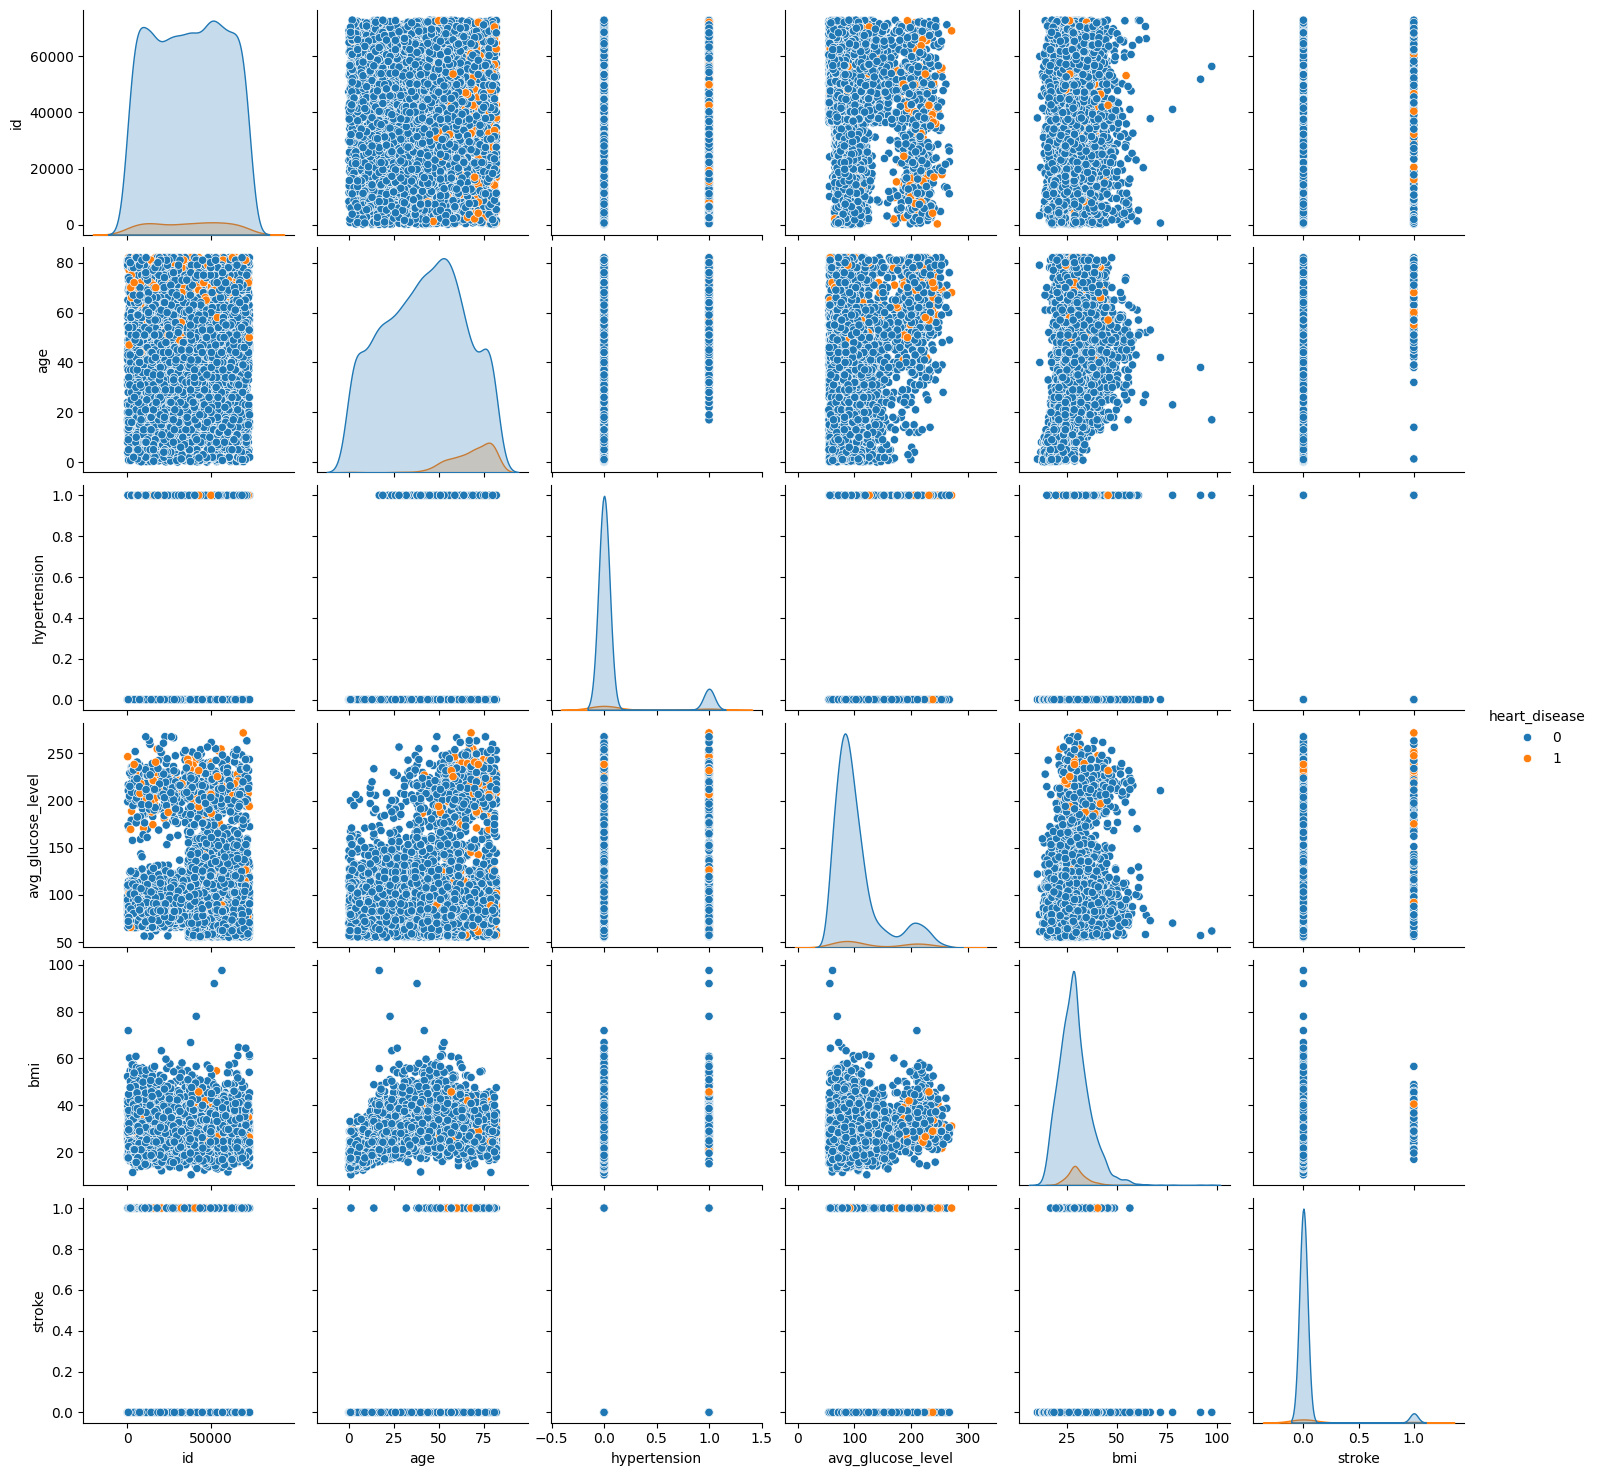

In [19]:
# Create a pairplot to visualize relationships between variables, with observations colored by 'heart_disease'
sns.pairplot(df, hue='heart_disease')
plt.show()


In [20]:

# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


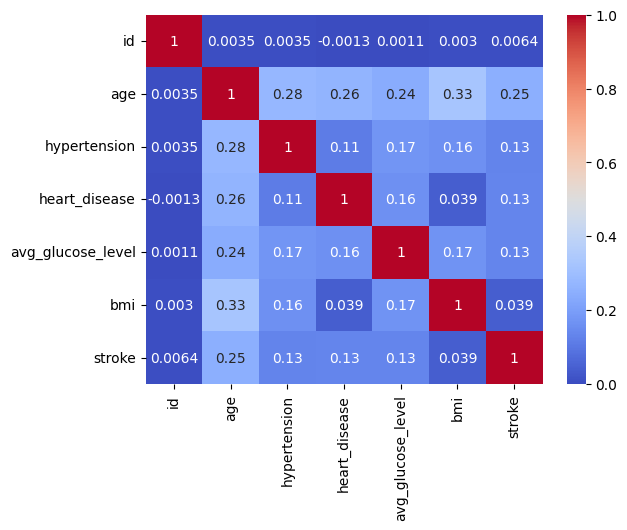

In [21]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


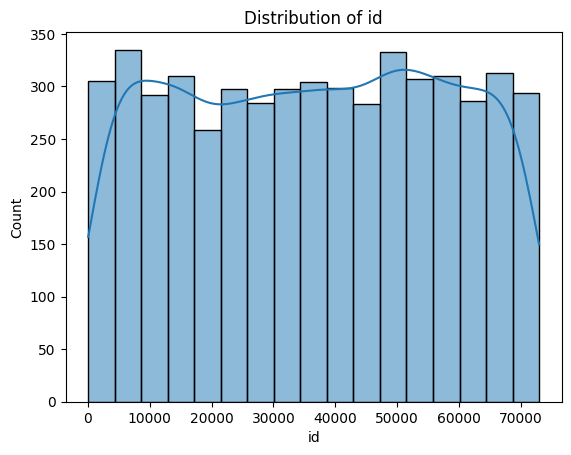

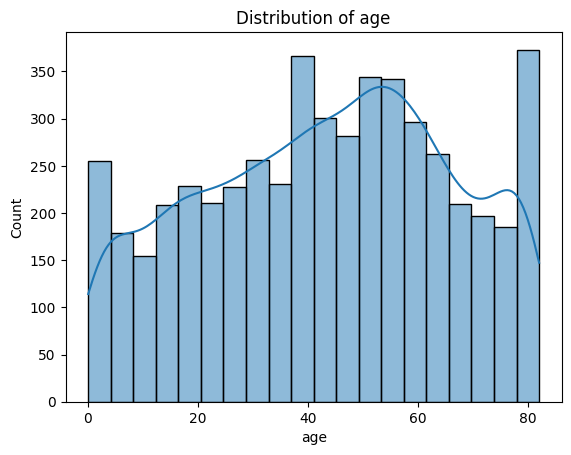

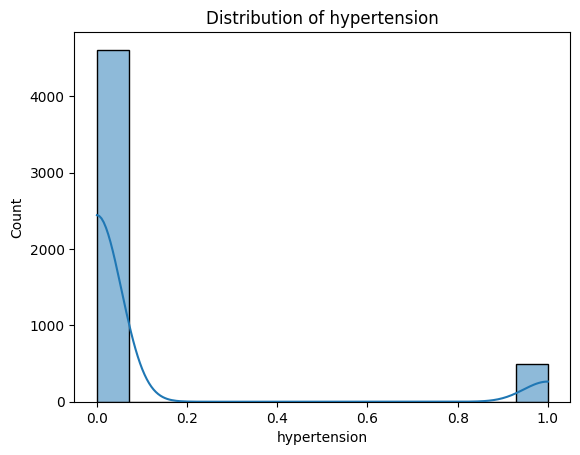

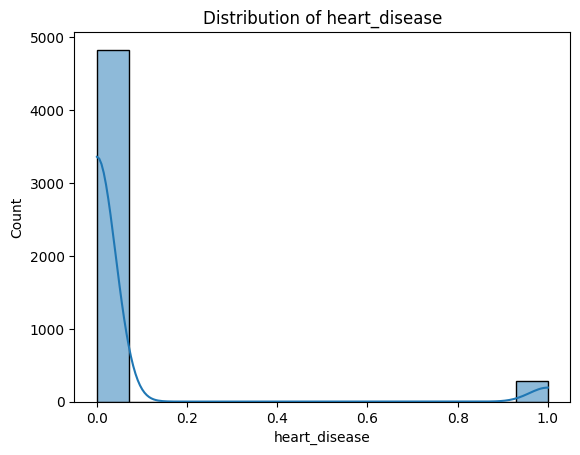

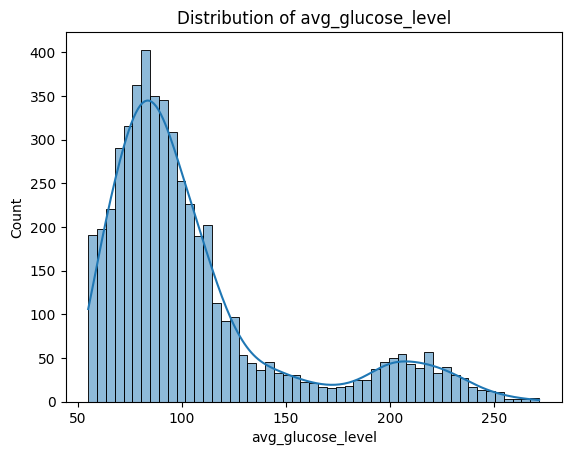

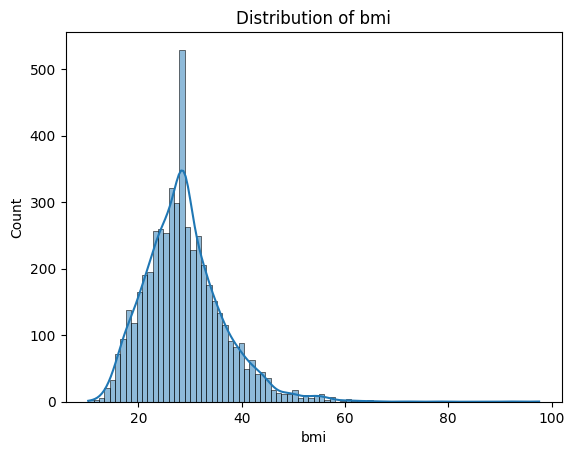

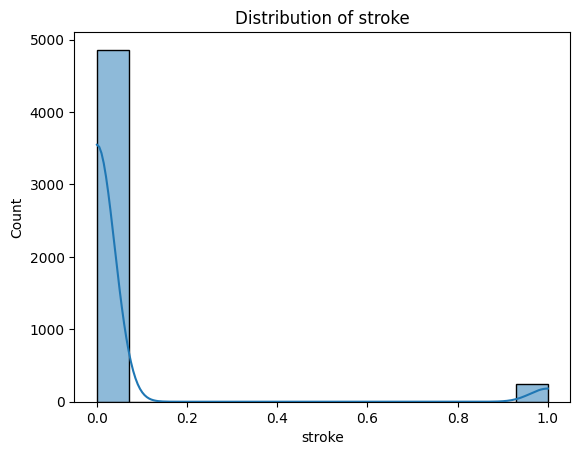

In [22]:

# Distribution of numerical variables
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
 plt.figure()
 sns.histplot(df[col], kde=True)
 plt.title(f'Distribution of {col}')
 plt.show()

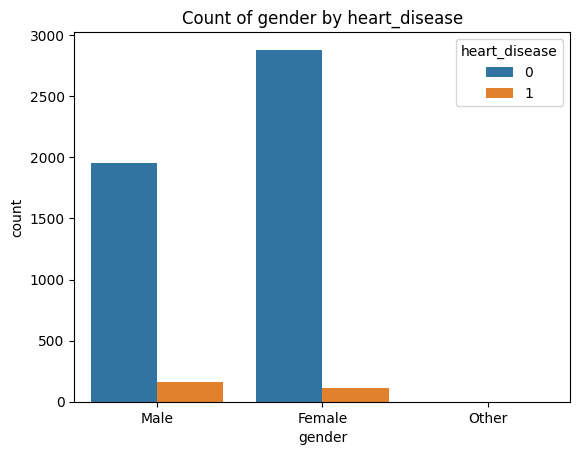

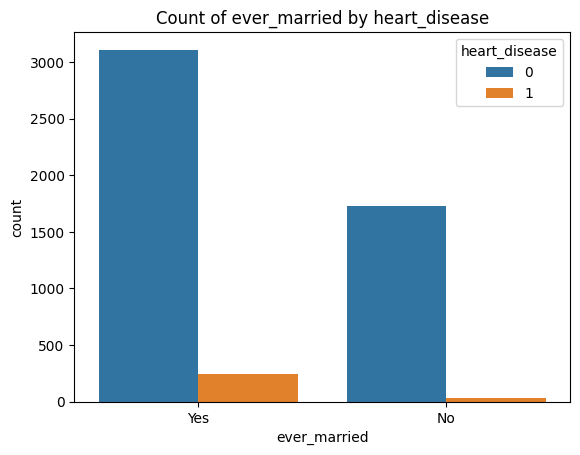

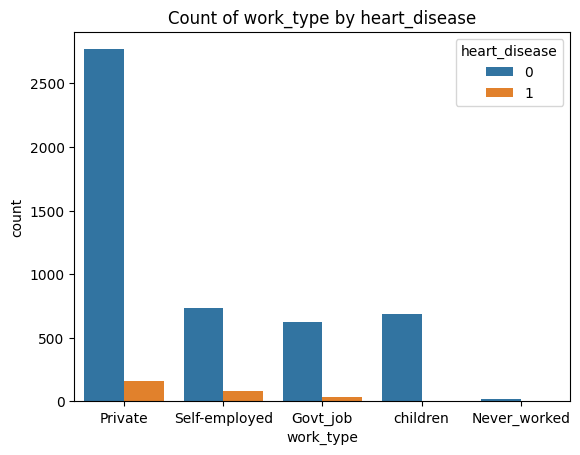

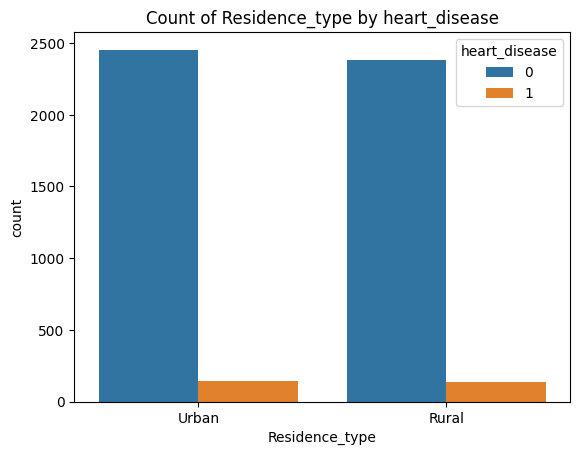

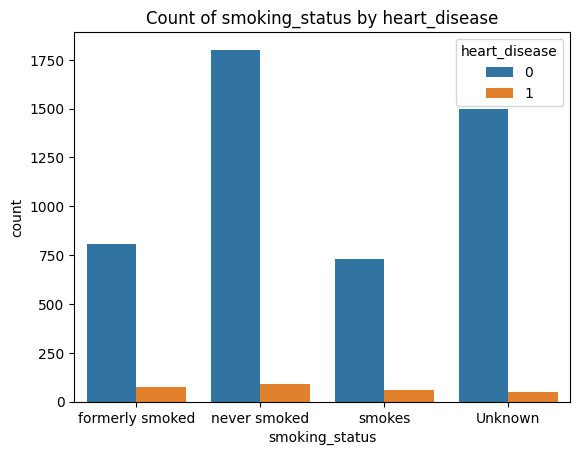

In [23]:
# Bar plot for categorical variables
cat_cols = df.select_dtypes(exclude='number').columns
for col in cat_cols:
 plt.figure()
 sns.countplot(x=col, data=df, hue='heart_disease')
 plt.title(f'Count of {col} by heart_disease')
 plt.show()

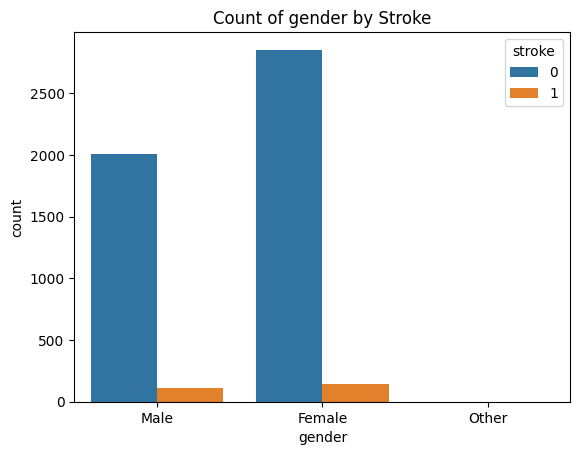

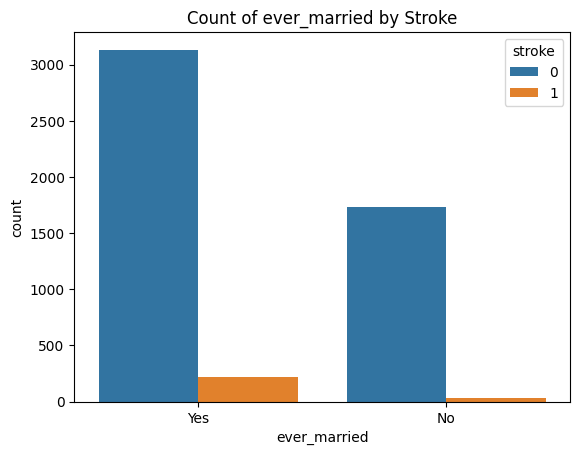

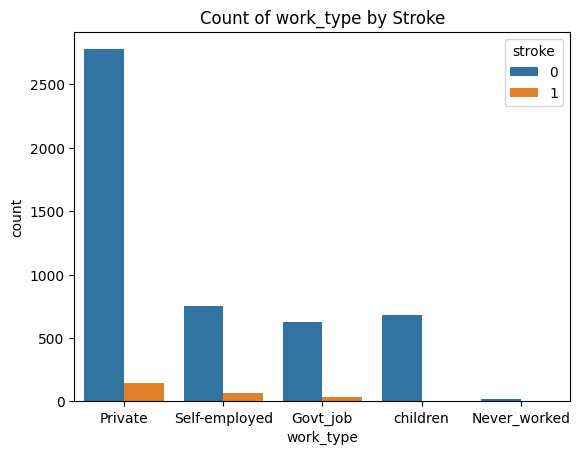

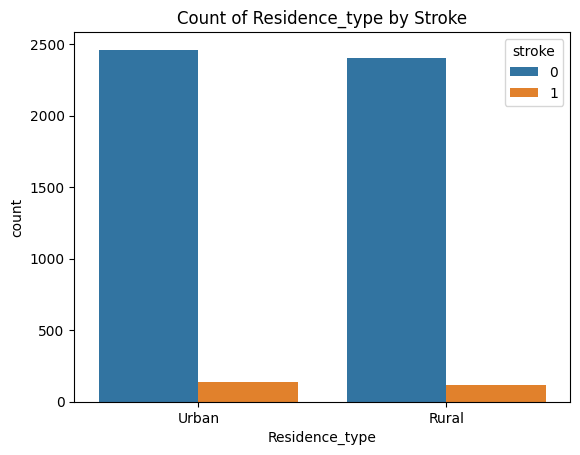

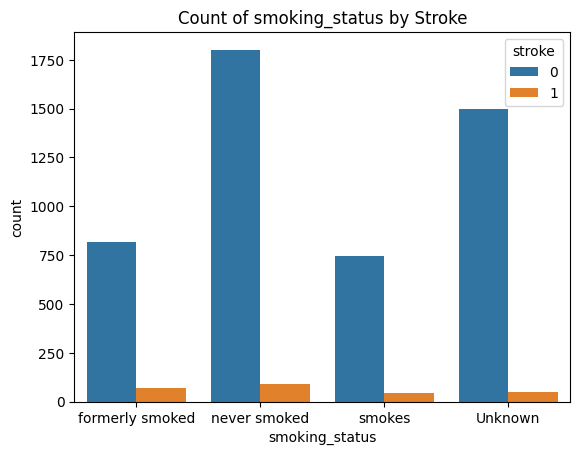

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, hue='stroke')
    plt.title(f'Count of {col} by Stroke')
    plt.show()

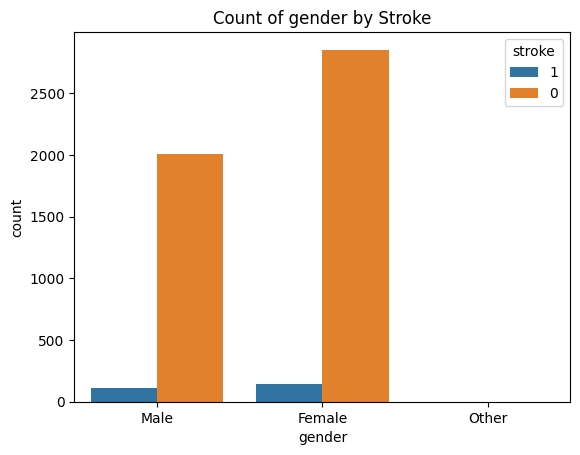

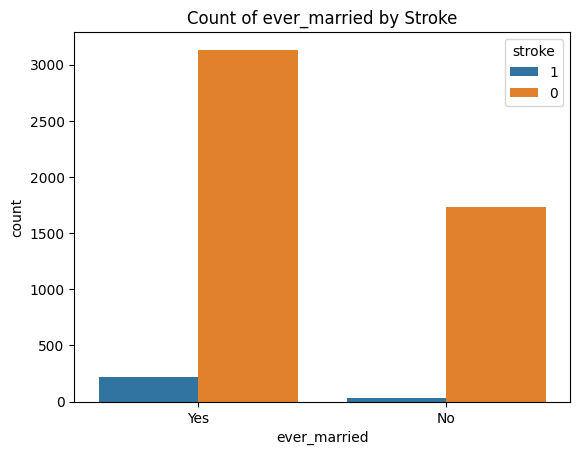

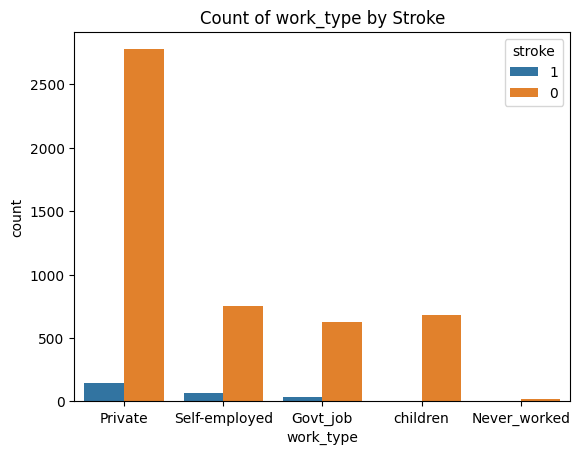

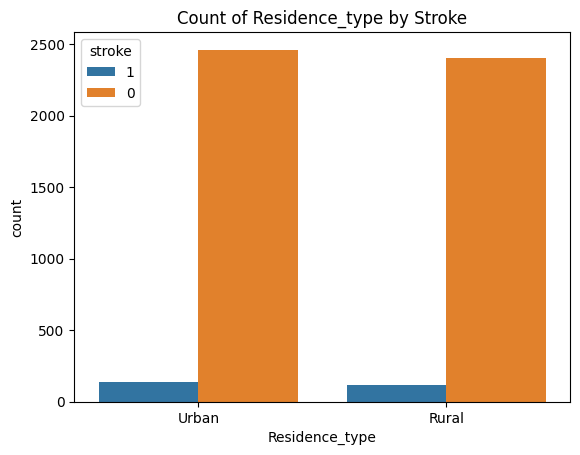

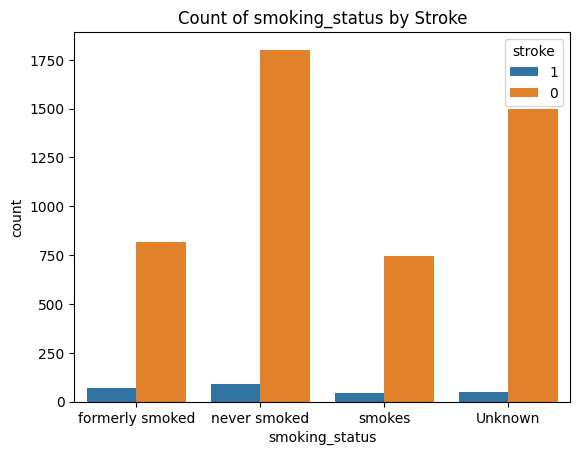

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    plt.figure()
    df['stroke'] = df['stroke'].astype(str)  # Convert 'stroke' column to string
    sns.countplot(x=col, data=df, hue='stroke')
    plt.title(f'Count of {col} by Stroke')
    plt.show()

In [26]:

# Feature engineering
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']
X = pd.get_dummies(X)

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [32]:


print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9383561643835616
Confusion Matrix:
[[959   1]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [33]:
# Save the trained model
joblib.dump(model, 'stroke_prediction_model.pkl')

['stroke_prediction_model.pkl']

In [34]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
predictedprice= model.predict([[2,5,6,3,4,]])
print(predictedprice)

ValueError: Found array with dim 4. RandomForestClassifier expected <= 2.